Λένα Φωτάκη:0311414793
Ιωάννης Παλιάκης:03114877 

Βήμα 1
Διαβάζουμε και Αποθηκεύουμε στις μορφές που ζητήθηκαν 

In [ ]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
tr=0
ts=0
with open('train.txt','r') as train:
    while train.readline()!='':
        tr=tr+1
with open('test.txt','r') as test:
    while test.readline()!='':
        ts=ts+1
X_train = np.zeros((tr,256))
Y_train = np.zeros((tr,))
X_test = np.zeros((ts,256))
Y_test = np.zeros((ts,))
with open('train.txt','r') as train:
        for i in range(0,tr):
            line = train.readline().split()
            Y_train[i]=float(line[0])
            for j in range (0,256):
                X_train[i,j]=float(line[j+1])
with open('test.txt','r') as test:
        for i in range(0,ts):
            line = test.readline().split()
            Y_test[i]=float(line[0])
            for j in range (0,256):
                X_test[i,j]=float(line[j+1]) 
print(Y_train,Y_test)                

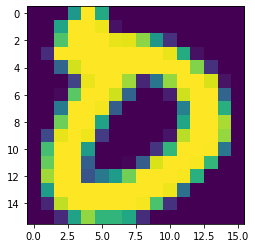

In [2]:
image=np.reshape(X_train[130],(16,16))
plt.imshow(image)

Βήμα 3
Τυπώνουμε μέχρι να βρούμε 10 διαφορετικά ψηφία και σταματάμε την λούπα

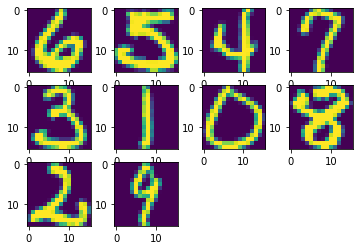

In [3]:
ar=[0]*10
axs = plt.subplots(10)
k=0    
for i in range(tr):
    if k==10:
        break
    index=int(Y_train[i])
    if ar[index]==0:
        image=np.reshape(X_train[i],(16,16))
        plt.subplot(3,4,k+1)
        plt.imshow(image)
        ar[index]+=1
        k+=1
plt.show()  

        
        
        

Βήμα 4
Για κάθε ψηφίο που είναι 0 παίρνουμε τα πίξελ του και φτιάχνουμε ένα καινούργιο πίνακα και υπολογίζουμε το mean του από κάτω

In [4]:
total=0
#sum1=0
zeros=[]
pixel=[]
for i in range(tr):
    if int(Y_train[i])==0:
        zeros.append(X_train[i])
        array=np.reshape(X_train[i],(16,16))
        pixel.append(array[10][10])
        #sum1+=array[10][10]
        #sum1+=X_train[i][10*16 + 10]
        total+=1
#print(sum1/total)
mean_of_pixel_10_10 = stat.mean(pixel)
print(mean_of_pixel_10_10)

-0.5041884422110553


Βήμα 5 
Η διασπορά αυτού του πίνακα (του ίδιου που χρησιμοποιήσαμε για το mean)

In [5]:
var_of_pixel_10_10 = stat.variance(pixel)
print(var_of_pixel_10_10)
    
    

0.5249618093885184


Βήμα 6
Καινούργιοι πίνακας για κάθε πίξελ και επαναλαμβάνουμε την από πάνω διαδικασία (τυπώνουμε το 10x10 πιξελ για να δέιξουμε πως είναι το ίδιο με από πάνω σε mean και variance)

In [6]:
rows, cols = (256, total) 
total_zeros_ar = [[0]*cols]*rows 
mean_of_zeros=[0]*256
variance_of_zeros=[0]*256
for j in range(256):
    for i in range(total):
        total_zeros_ar[j][i]=zeros[i][j]
    mean_of_zeros[j]=stat.mean(total_zeros_ar[j])
    variance_of_zeros[j]=stat.variance(total_zeros_ar[j])
print(mean_of_zeros[170],variance_of_zeros[170])

-0.5041884422110553 0.5249618093885184


Βήμα 7

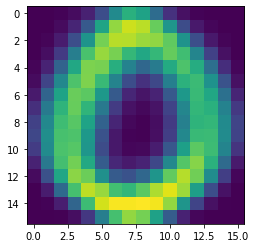

In [7]:
image=np.reshape(mean_of_zeros,(16,16))
plt.imshow(image)

Βήμα 8
Η εικόνα που τυπώσαμε από το variance στην περιφέρεια του κύκλου έχει μεγαλύτερο όγκο.Αυτό συμβαίνει διότι σε αυτά τα σημεία οι διαφορές των πίξελ από την μέση τιμή είναι πολύ πιο μεγάλες από τα άλλα σημεία και για αυτό έχει και μεγαλύτερη τιμή το variance εκεί. Ακόμη εσωτερικά της περιφέρειας είναι αρκετά λαμπρό αυτό σημαίνει ότι η διαφορά των διαφόρων τιμών από την μέση τιμή σε αυτά τα σημεία είναι πιο έντονη

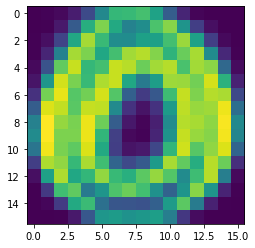

In [8]:
image=np.reshape(variance_of_zeros,(16,16))
plt.imshow(image)

Βήμα 9 α
Ουσιαστικά κάνουμε την ίδια διαδικασία με παραπω έχοντας προσθέσει μία παραπάνω διάσταση στους πίνακαες για τα ψηφία

In [9]:
dif_by_num_ar = []
arr_divided_by_pixel_of_all_digits= []
how_many = [0]*10
arr_with_means = [] 
for i in range(10):
    arr_divided_by_pixel_of_all_digits.append([])
    dif_by_num_ar.append([])
    arr_with_means.append([])
    for j in range(256):
        arr_divided_by_pixel_of_all_digits[i].append([])
for i in range (tr):
    number = int(Y_train[i])
    how_many[number]+=1
    dif_by_num_ar[number].append(X_train[i])
for i in range(10):
    for j in range(256):
        for k in range(how_many[i]):
            arr_divided_by_pixel_of_all_digits[i][j].append(dif_by_num_ar[i][k][j])
for i in range(10):
    for j in range(256):
        arr_with_means[i].append(stat.mean(arr_divided_by_pixel_of_all_digits[i][j]))
for i in range(10):
    print("stats of digit ",i,":")
    for j in range(256):
        print("mean: ",i,j,arr_with_means[i][j],"variance: ",stat.variance(arr_divided_by_pixel_of_all_digits[i][j]))

stats of digit  0 :
mean:  0 0 -0.9986281407035176 variance:  0.002247105527638191
mean:  0 1 -0.9953978224455612 variance:  0.00661218108494414
mean:  0 2 -0.9849229480737018 variance:  0.019607043513179195
mean:  0 3 -0.941251256281407 variance:  0.06295392508224273
mean:  0 4 -0.8333425460636515 variance:  0.18051771072813075
mean:  0 5 -0.5714229480737019 variance:  0.3724256876875296
mean:  0 6 -0.13158458961474037 variance:  0.5321290661831088
mean:  0 7 0.15260804020100502 variance:  0.5386525838749489
mean:  0 8 0.04628391959798995 variance:  0.5630578497495862
mean:  0 9 -0.35370100502512564 variance:  0.4580043908288298
mean:  0 10 -0.741248743718593 variance:  0.23612581988526032
mean:  0 11 -0.9209162479061976 variance:  0.082746842937796
mean:  0 12 -0.9850251256281407 variance:  0.012196822503127541
mean:  0 13 -0.9971825795644891 variance:  0.002346974180766925
mean:  0 14 -0.9999346733668342 variance:  2.2505486358868988e-06
mean:  0 15 -1.0 variance:  0.0
mean:  0 16 -

mean:  0 145 -0.10246901172529313 variance:  0.7973209550322161
mean:  0 146 0.29297403685092127 variance:  0.6392436464334806
mean:  0 147 0.3154891122278057 variance:  0.640600885463922
mean:  0 148 -0.03203601340033501 variance:  0.7738023767405061
mean:  0 149 -0.5386591289782244 variance:  0.524883034589685
mean:  0 150 -0.8793592964824121 variance:  0.15093227565952141
mean:  0 151 -0.9811373534338358 variance:  0.020425744739343547
mean:  0 152 -0.9900904522613065 variance:  0.009220114192083637
mean:  0 153 -0.9272646566164154 variance:  0.08399490726614352
mean:  0 154 -0.6612889447236181 variance:  0.41007503043928784
mean:  0 155 -0.14991541038525963 variance:  0.7280305737271157
mean:  0 156 0.2325678391959799 variance:  0.6732317108172884
mean:  0 157 0.24436934673366834 variance:  0.651889005966547
mean:  0 158 -0.12045979899497487 variance:  0.7842139065971097
mean:  0 159 -0.6351675041876047 variance:  0.3635409476103625
mean:  0 160 -0.6791943048576214 variance:  0.308

mean:  1 27 -0.9996099502487562 variance:  8.662659412102833e-05
mean:  1 28 -1.0 variance:  0.0
mean:  1 29 -1.0 variance:  0.0
mean:  1 30 -1.0 variance:  0.0
mean:  1 31 -1.0 variance:  0.0
mean:  1 32 -1.0 variance:  0.0
mean:  1 33 -1.0 variance:  0.0
mean:  1 34 -1.0 variance:  0.0
mean:  1 35 -1.0 variance:  0.0
mean:  1 36 -0.9988557213930348 variance:  0.0012051315533884363
mean:  1 37 -0.9760935323383084 variance:  0.01748511474896434
mean:  1 38 -0.4838228855721393 variance:  0.3487999247745337
mean:  1 39 0.8445223880597015 variance:  0.07187002663970982
mean:  1 40 0.8353950248756219 variance:  0.07608232686765376
mean:  1 41 -0.4785930348258706 variance:  0.371054743576936
mean:  1 42 -0.9602865671641792 variance:  0.038601559231729796
mean:  1 43 -0.9995263681592039 variance:  6.586708291213256e-05
mean:  1 44 -1.0 variance:  0.0
mean:  1 45 -1.0 variance:  0.0
mean:  1 46 -1.0 variance:  0.0
mean:  1 47 -1.0 variance:  0.0
mean:  1 48 -1.0 variance:  0.0
mean:  1 49 -1.

mean:  1 217 -0.48798805970149256 variance:  0.37918233651067373
mean:  1 218 -0.9517094527363185 variance:  0.04902824816752889
mean:  1 219 -0.9954905472636816 variance:  0.00801592346633367
mean:  1 220 -0.9960199004975124 variance:  0.007952270519910409
mean:  1 221 -0.9960199004975124 variance:  0.007952270519910409
mean:  1 222 -0.996702487562189 variance:  0.005692896457949297
mean:  1 223 -0.9991014925373134 variance:  0.0008113522388059702
mean:  1 224 -0.9989621890547263 variance:  0.001082436815920398
mean:  1 225 -0.9967512437810945 variance:  0.0055265635567184
mean:  1 226 -0.9960746268656716 variance:  0.007736593030861627
mean:  1 227 -0.9960199004975124 variance:  0.007952270519910409
mean:  1 228 -0.9958099502487562 variance:  0.007986283566232582
mean:  1 229 -0.9642328358208955 variance:  0.031901664856989954
mean:  1 230 -0.4050398009950249 variance:  0.3658147653465739
mean:  1 231 0.8266467661691542 variance:  0.10881654342827694
mean:  1 232 0.8075621890547263 v

mean:  2 95 -0.9856005471956224 variance:  0.017774234739426194
mean:  2 96 -0.9914487004103967 variance:  0.008832817570226562
mean:  2 97 -0.9700027359781122 variance:  0.040360046567846634
mean:  2 98 -0.9388659370725034 variance:  0.07242379844086727
mean:  2 99 -0.8941354309165527 variance:  0.1365869967018346
mean:  2 100 -0.8734993160054719 variance:  0.15171295993103837
mean:  2 101 -0.8562311901504788 variance:  0.17678619442310214
mean:  2 102 -0.8324664842681259 variance:  0.2302766601765268
mean:  2 103 -0.7003242134062927 variance:  0.365831696111538
mean:  2 104 -0.4091532147742818 variance:  0.6074919216985551
mean:  2 105 -0.1003625170998632 variance:  0.7032902560725597
mean:  2 106 -0.031060191518467853 variance:  0.7070504374679084
mean:  2 107 -0.2897127222982216 variance:  0.6748557913310721
mean:  2 108 -0.6082284541723666 variance:  0.4786323792440455
mean:  2 109 -0.8271108071135431 variance:  0.23788581099263534
mean:  2 110 -0.9399986320109439 variance:  0.082

mean:  2 225 -0.5393091655266757 variance:  0.5011102878473849
mean:  2 226 -0.19593296853625172 variance:  0.6939423913910387
mean:  2 227 0.00487688098495212 variance:  0.72843344235519
mean:  2 228 0.06327906976744185 variance:  0.7408586781777636
mean:  2 229 0.013514363885088919 variance:  0.7694346035605195
mean:  2 230 -0.10538850889192887 variance:  0.7695137337855819
mean:  2 231 -0.2509890560875513 variance:  0.7394042491951351
mean:  2 232 -0.39706292749658 variance:  0.6562249795963495
mean:  2 233 -0.5091135430916552 variance:  0.5846639254464704
mean:  2 234 -0.5307318741450069 variance:  0.5530708512977157
mean:  2 235 -0.44146511627906976 variance:  0.627944665562281
mean:  2 236 -0.37539124487004105 variance:  0.6647353864437907
mean:  2 237 -0.43912448700410395 variance:  0.6027012954406611
mean:  2 238 -0.5896306429548563 variance:  0.4668002935254764
mean:  2 239 -0.8316388508891929 variance:  0.17047534336525308
mean:  2 240 -0.9722900136798905 variance:  0.0176735

mean:  3 116 -0.5295501519756839 variance:  0.5241197029604031
mean:  3 117 -0.1519164133738602 variance:  0.7205795531244072
mean:  3 118 0.17741185410334345 variance:  0.6981856124620061
mean:  3 119 0.40838297872340423 variance:  0.5452552290553451
mean:  3 120 0.49639209726443767 variance:  0.48374263445799964
mean:  3 121 0.49670060790273557 variance:  0.4672317930285492
mean:  3 122 0.3662841945288754 variance:  0.5371264046508724
mean:  3 123 0.05328419452887538 variance:  0.662553573600644
mean:  3 124 -0.3903176291793313 variance:  0.5741111911955883
mean:  3 125 -0.7308100303951368 variance:  0.3314837340240478
mean:  3 126 -0.9117750759878419 variance:  0.11906770580098355
mean:  3 127 -0.9869042553191489 variance:  0.009680817303021472
mean:  3 128 -0.9965683890577508 variance:  0.0029655272792882817
mean:  3 129 -0.9762492401215805 variance:  0.03226093321859979
mean:  3 130 -0.9562021276595745 variance:  0.05695859074128048
mean:  3 131 -0.8641823708206687 variance:  0.17

mean:  4 14 -0.9143205521472393 variance:  0.09430060522980219
mean:  4 15 -0.9783957055214724 variance:  0.020964469904724208
mean:  4 16 -0.9989509202453988 variance:  0.00036262124339147894
mean:  4 17 -0.9905322085889571 variance:  0.009760971311243673
mean:  4 18 -0.9564693251533742 variance:  0.05414178861213989
mean:  4 19 -0.8608374233128835 variance:  0.16091121469565464
mean:  4 20 -0.6614877300613496 variance:  0.37778383241450153
mean:  4 21 -0.5604739263803681 variance:  0.49287931575537397
mean:  4 22 -0.6746441717791412 variance:  0.3654655413945511
mean:  4 23 -0.7760414110429448 variance:  0.2853983346880212
mean:  4 24 -0.7506901840490797 variance:  0.31923504672377556
mean:  4 25 -0.5883588957055215 variance:  0.439253050719516
mean:  4 26 -0.409510736196319 variance:  0.5981403024959241
mean:  4 27 -0.3517101226993865 variance:  0.5863161355041324
mean:  4 28 -0.43470092024539875 variance:  0.5813809595690443
mean:  4 29 -0.6357791411042945 variance:  0.442256203066

mean:  4 163 -0.6531349693251534 variance:  0.43030936731597447
mean:  4 164 -0.5806717791411042 variance:  0.48589198427148417
mean:  4 165 -0.5201196319018405 variance:  0.5368600102437967
mean:  4 166 -0.417090490797546 variance:  0.6018775263610491
mean:  4 167 -0.17972852760736197 variance:  0.6721952057594263
mean:  4 168 0.1745766871165644 variance:  0.6392363581653521
mean:  4 169 0.27665184049079755 variance:  0.5981568263714154
mean:  4 170 -0.014674846625766872 variance:  0.7258910461866124
mean:  4 171 -0.39662116564417177 variance:  0.6214210129461046
mean:  4 172 -0.639170245398773 variance:  0.45284117988135286
mean:  4 173 -0.8021196319018404 variance:  0.2517810732238274
mean:  4 174 -0.9123941717791411 variance:  0.11265626067258488
mean:  4 175 -0.9736196319018405 variance:  0.02511050640355093
mean:  4 176 -0.9902822085889571 variance:  0.00949945940648177
mean:  4 177 -0.9557561349693251 variance:  0.05886630449379435
mean:  4 178 -0.899170245398773 variance:  0.13

mean:  5 43 0.043964028776978414 variance:  0.6495659302352712
mean:  5 44 -0.2096043165467626 variance:  0.6375189350443969
mean:  5 45 -0.5195269784172661 variance:  0.5172024262978807
mean:  5 46 -0.7300341726618705 variance:  0.32968227090219715
mean:  5 47 -0.9004460431654676 variance:  0.10818169978611705
mean:  5 48 -0.955544964028777 variance:  0.04748104121783654
mean:  5 49 -0.8605593525179857 variance:  0.20835506854300345
mean:  5 50 -0.686091726618705 variance:  0.3968963753548513
mean:  5 51 -0.40689388489208633 variance:  0.6339518860165921
mean:  5 52 -0.09070503597122302 variance:  0.7317282840106293
mean:  5 53 0.17583812949640287 variance:  0.6449053467237021
mean:  5 54 0.288044964028777 variance:  0.6112003817583771
mean:  5 55 0.2051205035971223 variance:  0.6330764413085747
mean:  5 56 -0.039136690647482014 variance:  0.6480775884892086
mean:  5 57 -0.2794802158273381 variance:  0.6390030969051785
mean:  5 58 -0.4443471223021583 variance:  0.5556013621718842
mean

mean:  5 196 -0.22662410071942446 variance:  0.654648519706397
mean:  5 197 -0.4247068345323741 variance:  0.5671036418270788
mean:  5 198 -0.6110791366906475 variance:  0.4044465054378119
mean:  5 199 -0.6741420863309352 variance:  0.35264687887419793
mean:  5 200 -0.5764172661870504 variance:  0.4566669607103506
mean:  5 201 -0.3268597122302158 variance:  0.6286993496532505
mean:  5 202 0.07231115107913669 variance:  0.7017001714790331
mean:  5 203 0.32098561151079136 variance:  0.5759977511439497
mean:  5 204 0.2278021582733813 variance:  0.6519647860133515
mean:  5 205 -0.1716978417266187 variance:  0.7610686472746127
mean:  5 206 -0.6174730215827338 variance:  0.45556993260418693
mean:  5 207 -0.8976978417266187 variance:  0.11422813556290103
mean:  5 208 -0.9565341726618705 variance:  0.0394335033346296
mean:  5 209 -0.7859136690647482 variance:  0.2443861402812885
mean:  5 210 -0.40288309352517987 variance:  0.5612741791010435
mean:  5 211 -0.01849280575539568 variance:  0.67348

mean:  6 74 -0.9832454819277109 variance:  0.01644643286040088
mean:  6 75 -0.984722891566265 variance:  0.01880379036508023
mean:  6 76 -0.987375 variance:  0.017167073340874812
mean:  6 77 -0.9910572289156626 variance:  0.011606518590197895
mean:  6 78 -0.9958599397590362 variance:  0.0038400452102527755
mean:  6 79 -0.9998373493975904 variance:  1.756626506024096e-05
mean:  6 80 -0.9986957831325302 variance:  0.0011294518072289155
mean:  6 81 -0.9934382530120482 variance:  0.00554438833842156
mean:  6 82 -0.9268674698795181 variance:  0.08257562041832489
mean:  6 83 -0.7177710843373494 variance:  0.36150393846880735
mean:  6 84 -0.28481024096385543 variance:  0.6056070559432299
mean:  6 85 0.31315060240963855 variance:  0.5300131869377964
mean:  6 86 0.34326204819277106 variance:  0.6040591107143506
mean:  6 87 -0.31945030120481926 variance:  0.5801544439818096
mean:  6 88 -0.8519789156626506 variance:  0.1544358607915826
mean:  6 89 -0.9610707831325301 variance:  0.0466371518449363

mean:  6 225 -0.9384593373493976 variance:  0.06764352775581965
mean:  6 226 -0.7394668674698796 variance:  0.30545015274673354
mean:  6 227 -0.30798343373493975 variance:  0.6037608850946773
mean:  6 228 0.2878012048192771 variance:  0.5657603525777317
mean:  6 229 0.640722891566265 variance:  0.33266172400007266
mean:  6 230 0.7190557228915663 variance:  0.2454824720033982
mean:  6 231 0.7259006024096386 variance:  0.2517585059423213
mean:  6 232 0.7116219879518072 variance:  0.2746233003302804
mean:  6 233 0.5961340361445783 variance:  0.3644385958835341
mean:  6 234 0.18546686746987953 variance:  0.6039162311781061
mean:  6 235 -0.36294126506024094 variance:  0.5684198592901016
mean:  6 236 -0.7672680722891566 variance:  0.2449020788584201
mean:  6 237 -0.9507710843373494 variance:  0.05325466245070781
mean:  6 238 -0.9923313253012048 variance:  0.006106414944847262
mean:  6 239 -0.9999894578313253 variance:  7.37951807228917e-08
mean:  6 240 -0.9997846385542168 variance:  3.079668

mean:  7 122 0.5141255813953488 variance:  0.4351457342048245
mean:  7 123 0.1826124031007752 variance:  0.6211358836968559
mean:  7 124 -0.46876589147286823 variance:  0.558382757219895
mean:  7 125 -0.8359209302325581 variance:  0.19942818783764263
mean:  7 126 -0.9715131782945736 variance:  0.032989464499975925
mean:  7 127 -0.994015503875969 variance:  0.004827108454908758
mean:  7 128 -0.9985875968992248 variance:  0.00044819611921613945
mean:  7 129 -0.9876403100775194 variance:  0.0141952679377919
mean:  7 130 -0.973137984496124 variance:  0.03682744521642833
mean:  7 131 -0.9692279069767442 variance:  0.044462281828686986
mean:  7 132 -0.9788170542635659 variance:  0.03266399442919736
mean:  7 133 -0.9778155038759689 variance:  0.03553355131205162
mean:  7 134 -0.9681875968992248 variance:  0.051905972516731666
mean:  7 135 -0.9330294573643411 variance:  0.0839258454042082
mean:  7 136 -0.5521503875968993 variance:  0.39509513418075015
mean:  7 137 0.3325937984496124 variance: 

mean:  8 8 0.21375461254612546 variance:  0.490014155939868
mean:  8 9 -0.062350553505535054 variance:  0.5429036772547763
mean:  8 10 -0.4104741697416974 variance:  0.4963065418454277
mean:  8 11 -0.6771033210332104 variance:  0.31622670649541984
mean:  8 12 -0.8695571955719558 variance:  0.14809114182428332
mean:  8 13 -0.9469354243542435 variance:  0.060717945914699444
mean:  8 14 -0.9753634686346864 variance:  0.02805270128776149
mean:  8 15 -0.9905571955719558 variance:  0.008724062341843381
mean:  8 16 -0.9904649446494465 variance:  0.006995151264229831
mean:  8 17 -0.9358062730627307 variance:  0.08699382376833935
mean:  8 18 -0.8105036900369004 variance:  0.25627547041149706
mean:  8 19 -0.5204059040590406 variance:  0.4992007961203457
mean:  8 20 -0.03498523985239853 variance:  0.6660286504286854
mean:  8 21 0.4120535055350554 variance:  0.5024777328065425
mean:  8 22 0.5851752767527675 variance:  0.35943979362053324
mean:  8 23 0.5685239852398524 variance:  0.3552619504402807

mean:  8 168 0.03337269372693727 variance:  0.646897354373137
mean:  8 169 0.07153690036900369 variance:  0.6419918387467516
mean:  8 170 -0.2175 variance:  0.663243814232902
mean:  8 171 -0.6087343173431734 variance:  0.44105346347818375
mean:  8 172 -0.8218413284132842 variance:  0.2514251244995259
mean:  8 173 -0.9155774907749078 variance:  0.12456917605432062
mean:  8 174 -0.9531531365313654 variance:  0.08075944230992217
mean:  8 175 -0.9866660516605166 variance:  0.012363435407302316
mean:  8 176 -0.9902416974169742 variance:  0.012477351825579254
mean:  8 177 -0.9517011070110701 variance:  0.0663861323093083
mean:  8 178 -0.8007380073800738 variance:  0.27017596080785206
mean:  8 179 -0.5310479704797048 variance:  0.5576141677500324
mean:  8 180 -0.12080627306273063 variance:  0.6800442267258255
mean:  8 181 0.14136346863468635 variance:  0.6407376365927522
mean:  8 182 -0.0581660516605166 variance:  0.6688185379951027
mean:  8 183 -0.386239852398524 variance:  0.551939025543785

mean:  9 63 -0.9789642857142857 variance:  0.02274292096200844
mean:  9 64 -0.9843198757763976 variance:  0.015471200786298699
mean:  9 65 -0.9014192546583851 variance:  0.12680770264578886
mean:  9 66 -0.668863354037267 variance:  0.40567557072341415
mean:  9 67 -0.12905745341614908 variance:  0.6446577369739092
mean:  9 68 0.3554006211180124 variance:  0.5026362311660211
mean:  9 69 0.003961180124223603 variance:  0.6044493966244217
mean:  9 70 -0.6031614906832298 variance:  0.40413100653960954
mean:  9 71 -0.773389751552795 variance:  0.2584832833162679
mean:  9 72 -0.5939332298136646 variance:  0.42246846054258475
mean:  9 73 -0.1498586956521739 variance:  0.6589616487423084
mean:  9 74 0.34953260869565217 variance:  0.5598522928697004
mean:  9 75 0.3549503105590062 variance:  0.5801534656453156
mean:  9 76 -0.2018835403726708 variance:  0.6450634187644291
mean:  9 77 -0.6872282608695652 variance:  0.38539316554533776
mean:  9 78 -0.8980481366459627 variance:  0.13846023251596265
m

mean:  9 197 -0.9722903726708074 variance:  0.033801351011369454
mean:  9 198 -0.803610248447205 variance:  0.21550196138780753
mean:  9 199 -0.07305900621118012 variance:  0.6152613495455117
mean:  9 200 0.5460791925465839 variance:  0.40673328920867824
mean:  9 201 -0.037827639751552795 variance:  0.5768606280995529
mean:  9 202 -0.6756195652173913 variance:  0.38894780994320105
mean:  9 203 -0.8958711180124224 variance:  0.14591107045535776
mean:  9 204 -0.9797624223602485 variance:  0.023307378927871103
mean:  9 205 -0.9933322981366459 variance:  0.010240010712595268
mean:  9 206 -0.9975124223602484 variance:  0.002879730794123045
mean:  9 207 -1.0 variance:  0.0
mean:  9 208 -1.0 variance:  0.0
mean:  9 209 -1.0 variance:  0.0
mean:  9 210 -0.9991288819875777 variance:  0.000488697204968944
mean:  9 211 -0.9973307453416149 variance:  0.001734856222771751
mean:  9 212 -0.9897996894409938 variance:  0.011587687651536373
mean:  9 213 -0.9353695652173913 variance:  0.08425704516870647

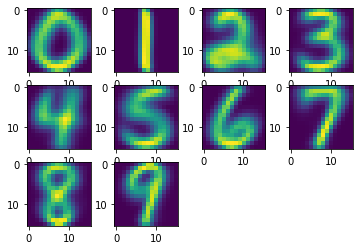

In [10]:
k=0
for i in range(10):
    image=np.reshape(arr_with_means[i],(16,16))
    plt.subplot(3,4,k+1)
    plt.imshow(image)
    k+=1
plt.show()  

Βήμα 10
Υπολογίζουμε την ευκλείδια απόσταση (δεύτερη νόρμα) με κάθε ψηφίο (από τον μέσο όρο των πίξελ του κάθε ψηφίου) και το κατηγοριοποιούμε εκεί που απέχει λιγότερο .Από το αποτέλεσμα φαίνεται ότι ήταν επιτυχής η ταξινόμηση

In [11]:
smallest=1000000
smallest_index=0
distance = [0]*10
ar1=np.reshape(X_test[100],(16,16))
for i in range(10):
    ar2=np.reshape(arr_with_means[i],(16,16))
    distance[i]=np.linalg.norm(ar1-ar2)
    if smallest>distance[i]:
        smallest=distance[i]
        smallest_index=i
print(smallest_index,Y_test[100])

0 0.0


Βήμα 11 α β 
Κάνουμε το ίδιο σαν λογική αλλά με πίνακα που έχει μία μεγαλύτερη διάσταση , το ποσοστό φαίνεται πως είναι 0.8141504733432985.

In [13]:
suc=0
sm = [10000]*ts
sm_in = [0]*ts
rows, cols = (ts, 10) 
distance= [[0]*cols]*rows
ar1=[0]*ts
for i in range(ts):
    ar1[i]=np.reshape(X_test[i],(16,16))
    for j in range(10):
        ar2 = np.reshape(arr_with_means[j],(16,16))
        distance[i][j]=np.linalg.norm(ar1[i]-ar2)
        if sm[i]>distance[i][j]:
            sm[i]=distance[i][j]
            sm_in[i]=j
for i in range(ts):
    if sm_in[i]==int(Y_test[i]):
        suc+=1
    #print(sm_in[i],Y_test[i])
print(suc/ts)

0.8141504733432985


Βήμα 12 
Υλοποιούμε την ταξινομιτή τον ευκλείδιο 

In [74]:
from sklearn.base import BaseEstimator, ClassifierMixin

class EuclideanClassifier(BaseEstimator, ClassifierMixin):  
    """Classify samples based on the distance from the mean feature value"""
    

    def __init__(self):
        self.X_mean_=[]

    def fit(self, X, y):
        in_of_256 = len(X[0])
        tr = len(y)
        dif_by_num_ar = []
        arr_divided_by_pixel_of_all_digits= []
        how_many = [0]*10  
        for i in range(10):
            arr_divided_by_pixel_of_all_digits.append([])
            dif_by_num_ar.append([])
            self.X_mean_.append([])
            for j in range(in_of_256):
                arr_divided_by_pixel_of_all_digits[i].append([])
        for i in range (tr):
            number = int(y[i])
            how_many[number]+=1
            dif_by_num_ar[number].append(X[i])
        for i in range(10):
            for j in range(in_of_256):
                for k in range(how_many[i]):
                    arr_divided_by_pixel_of_all_digits[i][j].append(dif_by_num_ar[i][k][j])
        for i in range(10):
            for j in range(in_of_256):
                self.X_mean_[i].append(stat.mean(arr_divided_by_pixel_of_all_digits[i][j]))
        return self
        raise NotImplementedError
        


    def predict(self, X):
        ts=len(X)
        suc=0
        sm = [10000]*ts
        sm_in = [0]*ts
        rows, cols = (ts, 10) 
        distance= [[0]*cols]*rows
        ar1=[0]*ts
        for i in range(ts):
            ar1[i]=X[i]
            for j in range(10):
                ar2 = self.X_mean_[j]
                distance[i][j]=np.linalg.norm(ar1[i]-ar2)
                if sm[i]>distance[i][j]:
                    sm[i]=distance[i][j]
                    sm_in[i]=j
        return sm_in
        raise NotImplementedError
    
    def score(self, X, y):
        hulio=self.predict(X)
        total=0
        pos=0
        for i in hulio:
            if i==y[pos]:
                total+=1
            pos+=1
        return (total/pos)*100
        raise NotImplementedError
        
        
        
r1 = EuclideanClassifier()
r1.fit(X_train,Y_train)
print(r1.score(X_test,Y_test))

81.41504733432984


Βήμα 13 α 
Βάζουμε σαν είσοδο τα 4/5 του τρέιν τεστ και για να κάνει τρέιν και το 1/5 για τεστ (κάθε φορά διαφορετικό 1/5) και παίρνουμε τα παρακάτω αποτελέσματα

In [77]:
parts = tr//5
r1 = EuclideanClassifier()
r1.fit(X_train[parts:],Y_train[parts:])
print(r1.score(X_train[:parts],Y_train[:parts]))
for i in range(2,6):
    r1= EuclideanClassifier()
    r1.fit(np.concatenate((X_train[:(i-1)*parts],X_train[i*parts:]), axis=0),np.concatenate((Y_train[:(i-1)*parts],Y_train[i*parts:]), axis=0)) 
    print(r1.score(X_train[(i-1)*parts:i*parts],Y_train[(i-1)*parts:i*parts]))



84.91083676268862
85.11659807956104
84.49931412894375
84.91083676268862
84.77366255144034


Βήμα 13 β
Σχεδιάζουμε τις περιοχές απόφασης με την βοήθεια της PCA που μας μειώνει από 256 τις διαστάσεις σε 2

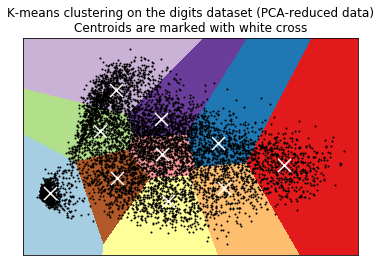

In [79]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = X_train

n_samples, n_features = data.shape
n_digits = len(np.unique(Y_train))
labels = Y_train


# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Βήμα 13 γ
Σχεδιάζουμε το learning curve 

<module 'matplotlib.pyplot' from '/home/rodia/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py'>

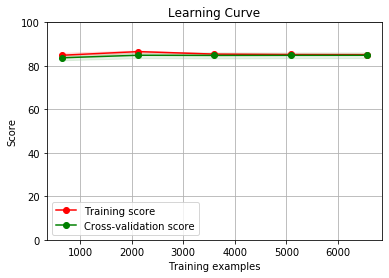

In [78]:
from sklearn.model_selection import learning_curve
import warnings

    
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


clf = EuclideanClassifier()
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, Y_train, cv = 10, n_jobs = 4,train_sizes=np.linspace(.1, 1.0, 5))    


plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 100))




